### Variables

**Age**: Edad de la paciente

**Race**: Raza de la paciente

**Marital Status**: Estado civil de la paciente

**T status**: Tamaño o extensión del tumor

**N Stage**: Número o Ubicación de los ganglios comprometidos

**6tth Stage**: 

**Differentiate**: Muestra qué tan desarrolladas están las células del cáncer

**Grade**: Grado determinado del cáncer

**A Stage**: Estado de la diseminación de la enfermedad (Regional)

**Tumor Size**: Tamaño del tumor (mm)

**Estrogen Status**: Estado de la progesterona

**Progesterone Status**: Estado de la progesterona

**Reginol Node Examined**: Ganglios examinados

**Survival Months**: Meses de supervivencia

**State**: Estado actual de la paciente (Sobreviviente o no sobreviviente)

## Inicio del Caso

In [18]:
#TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np
#GRÁFICOS
import matplotlib.pyplot as plt
import seaborn as sb
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans', 'DejaVuSerif', 'OpenSans-Italic']
plt.get
# import matplotlib.font_manager
# print(matplotlib.font_manager.findSystemFonts(fontpaths=[ '/usr/share/fonts/Open_Sans/static/'], fontext='ttf'))
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import plotly.express as px
#PREPARACIÓN DE DATOS
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
#MODELADO
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#EVALUACIÓN
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

#ADVERTENCIAS
import warnings
warnings.filterwarnings('ignore')

In [3]:
datos = pd.read_csv('data/datos_medicina.csv')
datos

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


# Exploración de Datos

In [4]:
#Identificar cantidad de nulos y tipologías
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
#Exploración Univariada de datos
datos.describe()

## Por rangos similares se define que no es necesario normalizar. Escalar siempre es recomendable

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [8]:
datos.describe(include='object')

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,4,2,2,2,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3413,2643,1786,2732,1305,2351,2351,3932,3755,3326,3408


### Analisis de distribuciones

<Axes: xlabel='Age', ylabel='Count'>

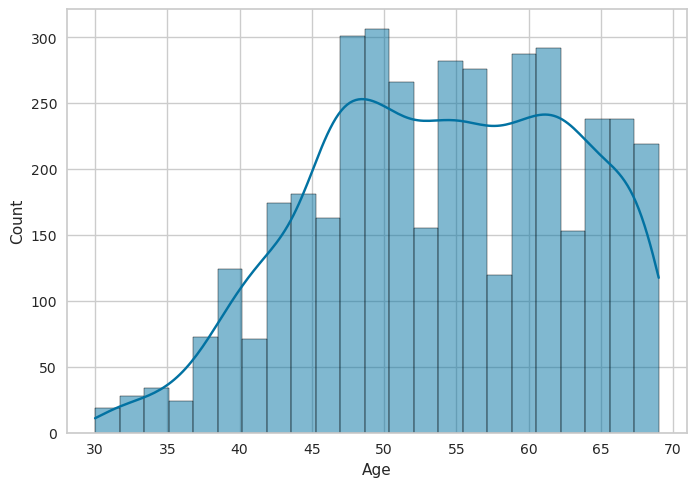

In [19]:
sb.histplot(data = datos, x= 'Age', kde=True)

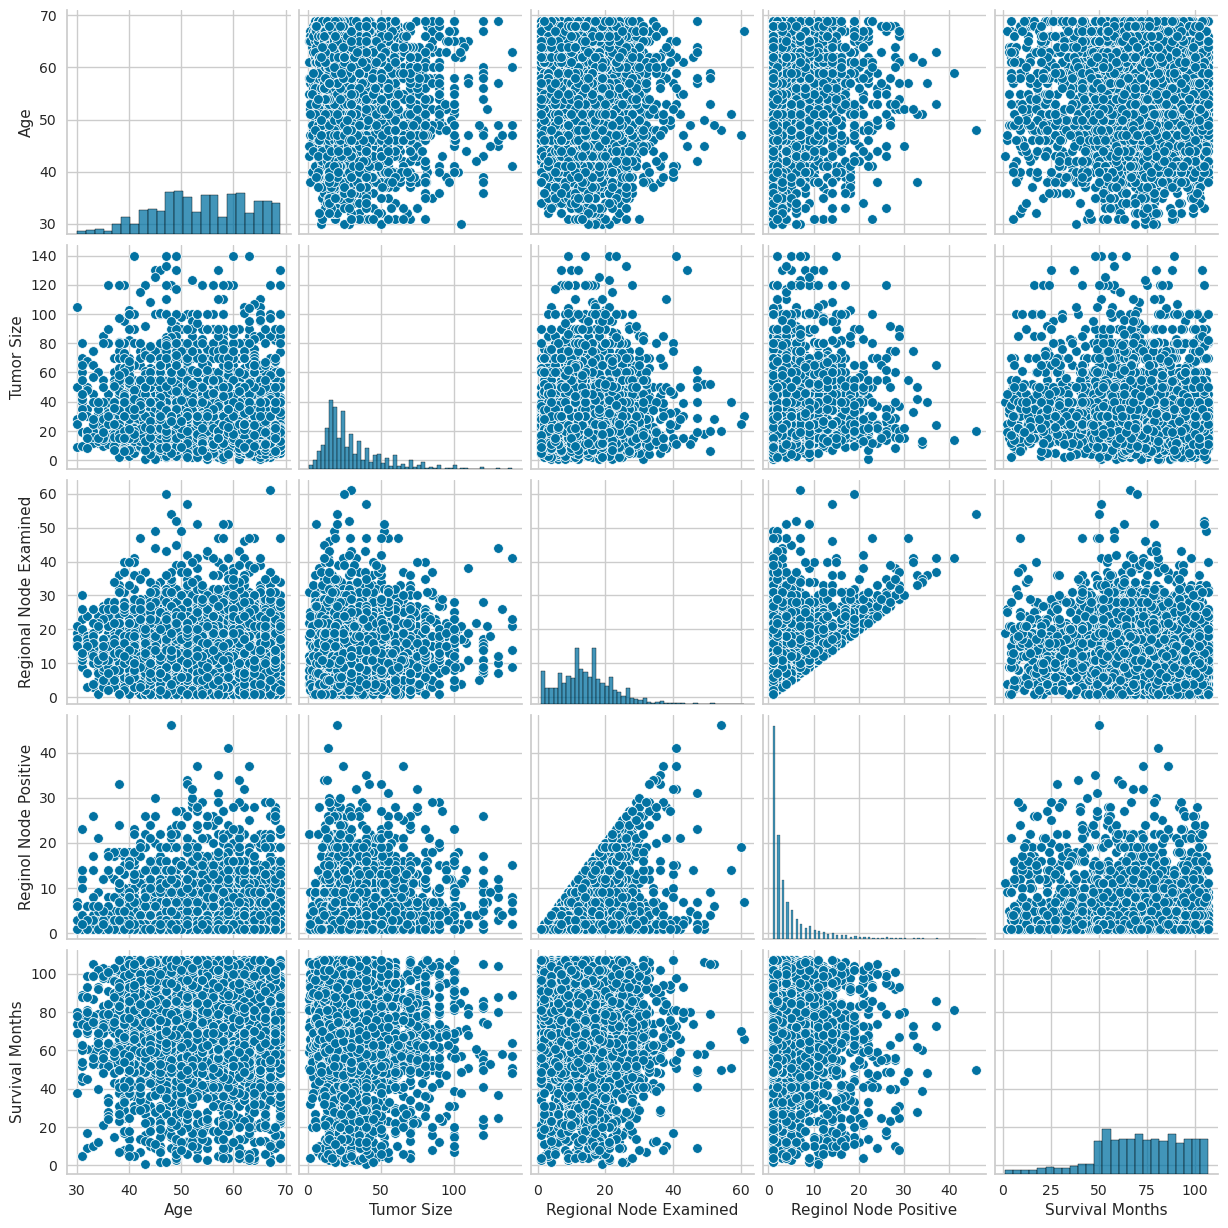

In [20]:
sb.pairplot(data=datos)